<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week10.do.txt --no_mako -->
<!-- dom:TITLE: March 18-22, 2024: Quantum Computing, Quantum Machine Learning and Quantum Information Theories -->

# March 18-22, 2024: Quantum Computing, Quantum Machine Learning and Quantum Information Theories
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and Facility for Rare Isotope Beams, Michigan State University

Date: **Week of March 18-22**

## Plans for the week of March 18-22, 2024

1. Discussion of project 1 and possible paths for project 2

2. Start discussion of Quantum Fourier transforms, basic mathematical expressions

3. Reading recommendation Hundt, Quantum Computing for Programmers, sections 6.1-6.4 on QFT.

<!-- to do: add material about continuous Fourier transform from standard course in math physics -->

## Possible paths for project 2

* Implement QFTs  and study the phase estimation algorithm and eventually Shor's algorithm for factorization of numbers.

* Study other algorithms

a. Deutsch-Jozsa algorithm: Determine if a function is constant or balance using the fewest number of queries.

b. SImon's algorithm: Determine if a function (Oracle) is one-to-one or two-to-one

c. Grover's algorithm: Search unstructured list of data fast

d. Shor's algorithm : Factorize integers efficiently

* Study the solution of quantum mechanical eigenvalue problems with systems from atomic/molecular physics and quantum chemistry

* Quantum machine learning projects

* Other paths

For project 2, in order to be time efficient, you can use software like Qiskit, Pennylane, qBraid and/or other

## Overarching motivation

After Simon's algorithm (to be discussed later), the next big breakthrough in quantum
algorithms occurred when Peter Shor discovered his algorithm for
efficiently factoring numbers. This algorithm makes use of the quantum
Fourier transform which is the topic of this sets of lectures.

We will start with discrete Fourier transforms (DFT).  There are many
motivations for the DFT. For those of you familiar with signal
processing, harmonic oscillations, and many other areas of
applications, Fourier transforms are almost standard kitchen
items. For those of you who have studied quantum theory, you have
probably met Fourier transforms when studying Heisenberg's uncertainty
relation between momentum and position.

## Continuous Fourier transforms and the principle of Superposition

For problems with so-called harmonic oscillations, given by for example the following differential equation

$$
m\frac{d^2x}{dt^2}+\eta\frac{dx}{dt}+x(t)=F(t),
$$

where $F(t)$ is an applied external force acting on the system (often
called a driving force), one can use the theory of Fourier
transformations to find the solutions of this type of equations.

## Quantum Fourier Transform

We turn now our attention to the quantum mechanical analogue of the discrete Fourier transform.
Again, we will express the final mathemtical operations interms of specific linear and invertible operations.
Furthermore, the quantum version  of the 
discrete Fourier transform requires only $O(n\log{n})$ gates
to be implemented, and is a part of many important quantum algorithms
such as the phase estimation algorithm and Shor's algorithm.

A useful way to solve problems in many fields of science, especially
in physics and mathematics, is to transform it into some other (often
simpler) problem for which a solution is known. The discrete fourier
transform, which involves such a transformation, is one of a few known
algorithms that can be computed much faster on a quantum computer than
on a classical.

## Fourier transform

Assume a periodic function $f(x)$ in an interval
$[ -\frac{L}{2}, \frac{L}{2} ]$. The Fourier series in exponential form can be written
as

$$
f(x) = \sum_{-\infty}^{\infty} A_n \exp{i(2\pi nx/L)},
$$

where

$$
A_n = \frac{1}{L} \int_{-L/2}^{L/2} f(x)\exp{-i(2\pi nx/L)} dx.
$$

## Several driving forces
If one has several driving forces, $F(t)=\sum_n F_n(t)$, one can find
the particular solution $x_{pn}(t)$ to the above differential equation for each $F_n$. The particular
solution for the entire driving force is then given by a series like

$$
x_p(t)=\sum_nx_{pn}(t).
$$

This is known as the principle of superposition. It only applies when
the homogenous equation is linear. 
Superposition is especially useful when $F(t)$ can be written
as a sum of sinusoidal terms, because the solutions for each
sinusoidal (sine or cosine)  term is analytic.

## Periodicity

Driving forces are often periodic, even when they are not
sinusoidal. Periodicity implies that for some time $t$ our function repeats itself periodically after a period $\tau$, that is

$$
F(t+\tau)=F(t).
$$

One example of a non-sinusoidal periodic force is a square wave. Many
components in electric circuits are non-linear, for example diodes. This 
makes many wave forms non-sinusoidal even when the circuits are being
driven by purely sinusoidal sources.

## Simple Code Example

The code here shows a typical example of such a square wave generated
using the functionality included in the **scipy** Python package. We
have used a period of $\tau=0.2$.

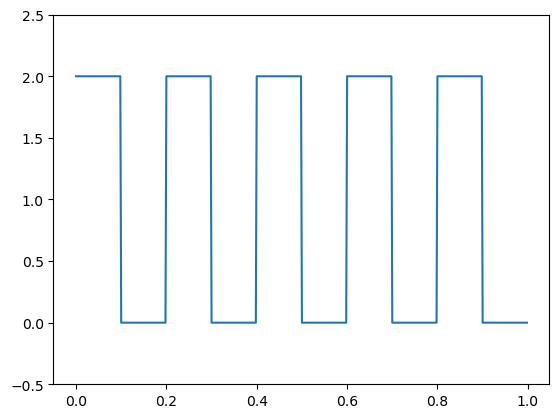

In [1]:
%matplotlib inline

import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt

# number of points                                                                                       
n = 500
# start and final times                                                                                  
t0 = 0.0
tn = 1.0
# Period                                                                                                 
t = np.linspace(t0, tn, n, endpoint=False)
SqrSignal = np.zeros(n)
SqrSignal = 1.0+signal.square(2*np.pi*5*t)
plt.plot(t, SqrSignal)
plt.ylim(-0.5, 2.5)
plt.show()

## Sinusoidal example
For the sinusoidal example the
period is $\tau=2\pi/\omega$. However, higher harmonics can also
satisfy the periodicity requirement. In general, any force that
satisfies the periodicity requirement can be expressed as a sum over
harmonics,

$$
F(t)=\frac{f_0}{2}+\sum_{n>0} f_n\cos(2n\pi t/\tau)+g_n\sin(2n\pi t/\tau).
$$

## Final words on Fourier Transforms

The code here uses the Fourier series applied to a 
square wave signal. The code here
visualizes the various approximations given by Fourier series compared
with a square wave with period $T=0.2$ (dimensionless time), width $0.1$ and max value of the force $F=2$. We
see that when we increase the number of components in the Fourier
series, the Fourier series approximation gets closer and closer to the
square wave signal.

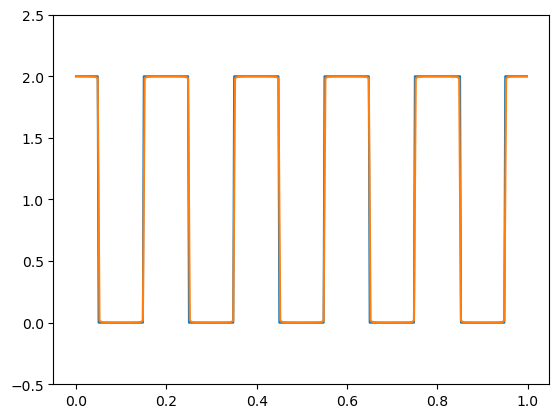

In [10]:
import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt

# number of points                                                                                       
n = 500
# start and final times                                                                                  
t0 = 0.0
tn = 1.0
# Period                                                                                                 
T =0.2
# Max value of square signal                                                                             
Fmax= 2.0
# Width of signal   
Width = 0.1
t = np.linspace(t0, tn, n, endpoint=False)
SqrSignal = np.zeros(n)
FourierSeriesSignal = np.zeros(n)
SqrSignal = 1.0+signal.square(2*np.pi*5*t+np.pi*Width/T)
a0 = Fmax*Width/T
FourierSeriesSignal = a0
Factor = 2.0*Fmax/np.pi
for i in range(1,n):
    FourierSeriesSignal += Factor/(i)*np.sin(np.pi*i*Width/T)*np.cos(i*t*2*np.pi/T)
plt.plot(t, SqrSignal)
plt.plot(t, FourierSeriesSignal)
plt.ylim(-0.5, 2.5)
plt.show()

### Fourier transforms and convolution

We can use Fourier transforms in our studies of convolution as
well. To see this, assume we have two functions $f$ and $g$ and their
corresponding Fourier transforms $\hat{f}$ and $\hat{g}$. We remind
the reader that the Fourier transform reads (say for the function $f$)

$$
\hat{f}(y)=\boldsymbol{F}[f(y)]=\frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \exp{-i\omega y} f(\omega),
$$

and similarly we have

$$
\hat{g}(y)=\boldsymbol{F}[g(y)]=\frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \exp{-i\omega y} g(\omega).
$$

## Inverse Fourier transform

The inverse Fourier transform is given by

$$
\boldsymbol{F}^{-1}[g(y)]=\frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \exp{i\omega y} g(\omega).
$$

The inverse Fourier transform of the product of the two functions $\hat{f}\hat{g}$ can be written as

$$
\boldsymbol{F}^{-1}[(\hat{f}\hat{g})(x)]=\frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \exp{i\omega x} \hat{f}(\omega)\hat{g}(\omega).
$$

## Rewriting
We can rewrite the latter as

$$
\boldsymbol{F}^{-1}[(\hat{f}\hat{g})(x)]=\int_{-\infty}^{\infty} d\omega \exp{i\omega x} \hat{f}(\omega)\left[\frac{1}{2\pi}\int_{-\infty}^{\infty}g(y)dy \exp{-i\omega y}\right]=\frac{1}{2\pi}\int_{-\infty}^{\infty}dy g(y)\int_{-\infty}^{\infty} d\omega \hat{f}(\omega) \exp{i\omega(x- y)},
$$

which is simply

$$
\boldsymbol{F}^{-1}[(\hat{f}\hat{g})(x)]=\int_{-\infty}^{\infty}dy g(y)f(x-y)=(f*g)(x),
$$

the convolution of the functions $f$ and $g$.

## Transforming to discrete variables

In the fourier transform $A_n$ is transformed from a dicrete variable
to a continous one as $L \rightarrow \inf$. We then replace $A_n$ with
$f(k)dk$ and let $n/L \rightarrow k$, and the sum is changed to an
integral. This gives

$$
f(x) = \int_{-\infty}^{\infty}dkF(k) \exp{i(2\pi kx)}
$$

and

$$
F(k) = \int_{-\infty}^{\infty}dxf(x) \exp{-i(2\pi kx)}
$$

One way to interpret the Fourier transform is then as a transformation from one basis to another.

## Discrete Fourier transform

Next we make another generalization by having a discrete function,
that is $f(x) \rightarrow f(x_k)$ with $x_k = k\Delta x$ for $k=0,\dots, N-1$. This leads to the sums

$$
f_x = \frac{1}{N} \sum_{k=0}^{N-1}F_k \exp{i(2\pi kx)/N},
$$

and

$$
F_k = \sum_{x=0}^{N-1}f_x \exp{-i(2\pi kx)/N}.
$$

Although we have used functions here, this could also be a set of
numbers.

## Simple example

As an example we can have a set of complex numbers
$\{x_0,\dots,x_{N-1}\}$ with fixed length $N$, we can Fourier
transform this as

$$
y_k = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} x_j \exp{i(2\pi jk)/N},
$$

leading to a new set of complex numbers $\{ y_0,\dots,y_{N-1}\}$.

## Discrete Fourier Transformations

Consider two sets of complex numbers $x_k$ and $y_k$ with
$k=0,1,\dots,n-1$ entries. The discrete Fourier transform is defined
as

$$
y_k = \frac{1}{\sqrt{n-1}} \sum_{j=0}^{n-1} \exp{(\frac{2\pi\imath jk}{n})} x_j.
$$

As an example, assume $x_0=1$ and $x_1=1$. We can then use the above expression to find $y_0$ and $y_1$.

With the above formula we get then

$$
y_0 = \frac{1}{\sqrt{2}} \left( \exp{(\frac{2\pi\imath 0\times 1}{2})} \times 1+\exp{(\frac{2\pi\imath 0\times 1}{2})}\times 2\right)=\frac{1}{\sqrt{2}}(1+2)=\frac{3}{\sqrt{2}},
$$

and

$$
y_1 = \frac{1}{\sqrt{2}} \left( \exp{(\frac{2\pi\imath 0\times 1}{2})} \times 1+\exp{(\frac{2\pi\imath 1\times 1}{2})}\times 2\right)=\frac{1}{\sqrt{2}}(1+2\exp{(\pi\imath)})=-\frac{1}{\sqrt{2}},
$$

## More details on Discrete Fourier transforms

Suppose that we have a vector $f$ of $N$ complex numbers, $f_{k}, k
\in\{0,1, \ldots, N-1\}$. Then the discrete Fourier transform (DFT) is
a map from these $N$ complex numbers to $N$ complex numbers, the
Fourier transformed coefficients $\tilde{f}_{j}$, given by

$$
\tilde{f}_{j}=\frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} \omega^{-j k} f_{k}
$$

where $\omega=\exp \left(\frac{2 \pi i}{N}\right)$.

## Invert DFT
The inverse DFT is given by

$$
f_{j}=\frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} \omega^{j k} \tilde{f}_{k}
$$

To see this consider how the basis vectors transform. If $f_{k}^{l}=\delta_{k, l}$, then

$$
\tilde{f}_{j}^{l}=\frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} \omega^{-j k} \delta_{k, l}=\frac{1}{\sqrt{N}} \omega^{-j l}
$$

## Orthonormality
These DFT vectors are orthonormal:

$$
\sum_{j=0}^{N-1} \tilde{f}^{l}{ }_{j}^{*} \tilde{f}_{j}^{m}=\frac{1}{N} \sum_{j=0}^{N-1} \omega^{j l} \omega^{-j m}=\frac{1}{N} \sum_{j=0}^{N-1} \omega^{j(l-m)}
$$

This last sum can be evaluated as a geometric series, but beware of the $(l-m)=0$ term, and yields

$$
\sum_{j=0}^{N-1} \tilde{f}^{l}{ }_{j}^{*} \tilde{f}_{j}^{m}=\delta_{l, m}
$$

From this we can check that the inverse DFT does indeed perform the inverse transform:

$$
f_{j}=\frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} \omega^{j k} \tilde{f}_{k}=\frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} \omega^{j k} \frac{1}{\sqrt{N}} \sum_{l=0}^{N-1} \omega^{-l k} f_{l}=\frac{1}{N} \sum_{k, l=0}^{N-1} \omega^{(j-l) k} f_{l}=\sum_{l=0}^{N-1} \delta_{j, l} f_{l}=f_{j}
$$

## Convolution again

An important property of the DFT is the above mentioned convolution
theorem. The circular convolution of two vectors $f$ and $g$ is given
by

$$
(f * g)_{i}=\sum_{j=0}^{N-1} f_{j} g_{i-j}
$$

where we define $g_{-m}=g_{N-m}$. The convolution theorem states that the DFT turns convolution into pointwise vector multiplication. In other words if the components of the DFT of $(f * g)$ are $\tilde{c}_{k}$, then $\tilde{c}_{k}=\tilde{f}_{k} \tilde{g}_{k}$. What use is the convolution theorem? Well this leads us nicely to our next topic, the fast Fourier transform.

## Fast Fourier transform (FFT)

Naively how many math operations do we have to do to perform a
discrete Fourier transform? Well for each component of the new vector
we will need to perform $N$ multiplications and then we will need to
add these components. Since we need to do this for each of the $N$
different component. Thus we see that $N^{2}$ complex multiplications
and $N(N-1)$ complex additions are needed to compute the DFT. The goal
of the fast Fourier transform is to perform the DFT using less basic
math operations. There are may ways to do this. We will describe one
particular method for $N=2^{n}$ and will put off discussion of the
case where $N \neq 2^{n}$ until later. So assume $N=2^{n}$ from here
until I say otherwise.

## FFT algorithm

The Fast Fourier Transform (FFT) is based on
observing the fact that there are symmetries of the coefficients
in the DFT,

$$
\begin{align*}
\omega^{k+N / 2} & =-\omega^{k} \\
\omega^{k+N} & =\omega^{k} .
\end{align*}
$$

## Splitting into smaller components

Suppose we want to perform the DFT of the vector $f$. Split the
components of $f$ up into smaller vectors of size $N / 2$, $e$ and
$o$. The coefficients of $e$ are the components of $f$ which are even
and the coefficients of $o$ are the components of $f$ which are
odd. The order of the coefficients is retained. Then it is easy to see
that

$$
\begin{align*}
\tilde{f}_{j} & =\frac{1}{\sqrt{N}} \sum_{i=0}^{N-1} \omega^{-i j} f_{i}=\frac{1}{\sqrt{N}} \sum_{i=0}^{N / 2-1} \omega^{-2 i j} e_{i}+\sum_{i=0}^{N / 2-1} \omega^{-(2 i+1) j} o_{i} \\
& =\frac{1}{\sqrt{N}}\left(\sum_{i=0}^{N / 2-1} \omega_{N / 2}^{-i j} e_{i}+\omega_{N}^{-j} \sum_{i=0}^{N / 2-1} \omega_{N / 2}^{-i j} o_{i}\right) 
\end{align*}
$$

where $\omega_{N / 2}=\exp \left(\frac{2 \pi i}{N}\right)$ and we have denoted $\omega$ by $\omega_{N}$ for clarity.

## Formula for DFT

We have thus obtained the a formula for the DFT of $f$ in terms of the DFT of $e$ and $o$ :

$$
\tilde{f}_{j}=\tilde{e}_{j}+\omega_{N}^{-j} \tilde{o}_{j}
$$

## Rearranging the sums

Recall that $j$ runs from 0 to $N-1$ and the DFTs of $e$ and $f$ are periodic with period $N / 2$. Using this and the above symmetry we find that we can express our formula as

$$
\begin{array}{ll}
\sqrt{2} \tilde{f}_{j}=\tilde{e}_{j}+\omega_{N}^{-j} \tilde{o}_{j} & 0 \leq j \leq N / 2-1 \\
\sqrt{2} \tilde{f}_{j}=\tilde{e}_{j}-\omega_{N}^{-j} \tilde{o}_{j} & N / 2-2 \leq j \leq N-1 
\end{array}
$$

## How many complex multiplications?

Suppose that we first compute the DFT over $e$ and $o$ and then uses
them in this formula to compute the full DFT of $f$. How many complex
multiplications do we need to perform? Well to compute $e$ and $o$
requires $2 \frac{N}{2}^{2}=\frac{N^{2}}{2}$ multiplications. We need
another $N / 2$ to compute $\omega_{N}^{-j} \tilde{o}_{j}$. Forget
about the square root of two, it can always be put in at the end as an
extra $N$ multiplications. Thus we require
$\frac{N^{2}}{2}+\frac{N}{2}$ complex multiplications to compute the
DFT as opposed to $N^{2}$ in the the previous method. This is a
reduction of about a factor of 2 for large $N$.

## More details

Further it is clear that for $N=2^{n}$ we can use the above trick all
the way down to $N=2$. How many complex multiplications do we need to
perform if we do this? Let $T_{n}$ denote the number of
multiplications at the $N=2^{n}$ th level, such that $T_{1}=4$. Then

$$
T_{n}=2 T_{n-1}+2^{n-1}.
$$

## Bounds

The latter can be bounded by

$$
T_{n} \leq 2 T_{n-1}+2^{n}
$$

which has solution $T_{n} \leq 2^{n} n$. In other words the running
time is bounded by $N \log N$. Thus we see that in the FFT we can
compute the DFT in a complexity of $N \log N$ operations. This is a
nice little improvement. Of historical interest apparently Gauss knew
the FFT algorithm.

## Application of the FFT

Suppose that you have two
polynomials with complex coefficients: $f(x)=a_{0}+a_{1}
x+\cdots+a_{N-1} x^{N-1}$ and $g(x)=b_{0}+b_{1} x+\cdots+b_{N-1}
x^{N-1}$. If you multiply these two polynomials\\ together you get a
new polynomial $f(x) g(x)=\sum_{i, j=0}^{N-1} a_{i} b_{j}
x^{i+j}=\sum_{k=0}^{2(N-1)} c_{k} x^{k}$. The new coefficients for
this polynomial are a function of the two polynomials:

$$
c_{k}=\sum_{l=0}^{N-1} a_{l} b_{k-l},
$$

where the sum is over all valid polynomial terms (i.e. when $k-l$ is negative, there is no term in the sum.) One sees that computing $c_{k}$ requires $N^{2}$ multiplications.

## Convolution yet again

The expression for $c_{k}$ looks a lot like convolution. Indeed
suppose that we form a $2 N$ dimensional vector $a=\left(a_{0},
\ldots, a_{N-1}, 0, \ldots, 0\right)$ and $b=\left(b_{0}, \ldots,
b_{N-1}, 0, \ldots, 0\right)$ from our original data. The vector $c$
which will represent the coefficients of the new polynomial are then
given by

$$
c_{k}=\sum_{l=0}^{2 N-1} a_{l} b_{k-l} \bmod 2 N
$$

## More discussions

Now we don't need to condition this sum on their being valid
terms. Now this is explicitly convolution! Thus we can compute the
coefficients $c_{k}$ by the following algorithm. Compute the DFT of
the vectors $a$ and $b$. Pointwise multiply these two vectors. Then
inverse DFT this new vector. The result will be $c_{k}$ by the
convolution theorem. If we use the FFT algorithm for this procedure,
then we will require $O(N \log N)$ multiplications. This is pretty
cool: by using the FFT we can multiply polynomials faster than our
naive grade school method for multiplying polynomials. It is good to
see that our grad school self can do things our grade school self
cannot do. Some of you will even know that you can use the FFT to
multiply integers $N$ integers with a cost of $O\left(N \log ^{2}
N\right)$ or used recursively: $O(N \log N \log \log N \log \log \log
N \cdots)$.

## Quantum Fourier transform

We now turn to the quantum Fourier transform. It is the same
transformation as described above, however we define it in terms of
the unitary operation

$$
\vert \psi'\rangle \leftarrow \hat{F}\vert \psi\rangle, \quad \hat{F}^\dagger \hat{F} = I
$$

## Orthonormal basis

In terms of an orthonormal basis $\vert 0 \rangle,\vert 1\rangle,\dots,\vert 0 \rangle$ this linear operator has the following action

$$
\vert j \rangle \rightarrow \sum_{k=0}^{N-1} \exp{i(2\pi jk/N)}\vert k
$$

or on an arbitrary state

$$
\sum_{j=0}^{N-1} x_j \vert j \rangle \rightarrow \sum_{k=0}^{N-1} y_k\vert k \rangle
$$

equivalent to the equation for discrete Fourier transform on a set of complex numbers.

## Using computational basis

Next we assume an $n$-qubit system, where we take $N=s^n$ in the computational basis

$$
\vert 0 \rangle,\dots,\vert 2^n -1\rangle.
$$

We make use of the binary representation $j = j_1 2^{n-1} + j_2
2^{n-2} + \dots + j_n 2^0$ , and take note of the notation $0.j_l
j_{l+1} \dots j_m$ representing the binary fraction $\frac{j_l}{2^1} +
\frac{j_{l+1}}{2^{2}} + \dots + \frac{j_m}{2^{m-l+1}}$. With this we
define the product representation of the quantum Fourier transform

$$
\vert j_1,\dots,j_n\rangle  \rightarrow 
\frac{
\left(\vert 0 \rangle + \exp{i(2\pi 0.j_n)}\right)
\left(\vert 0 \rangle + \exp{i(2\pi 0.j_{j-1}j_n)}\right)
\dots
\left(\vert 0 \rangle + \exp{i(2\pi 0.j_1j_2\dots j_n)}\right)
}{2^{n/2}}
$$

## Components

From the product representation we can derive a circuit for the
quantum Fourier transform. This will make use of the following two
single-qubit gates

$$
H = \frac{1}{\sqrt{2}}
    \begin{bmatrix}
        1 & 1 \\
        1 & -1
    \end{bmatrix}
$$

$$
R_k =
    \begin{bmatrix}
        1 & 0 \\
        0 & e^{2\pi i/2^{k}}
    \end{bmatrix}
$$

## Using the Hadamard gate
The Hadamard
gate on a single qubit creates an equal superposition of its basis
states, assuming it is not already in a superposition, such that

$$
H\vert 0 \rangle = \frac{1}{\sqrt{2}} \left(\vert 0 \rangle + \vert 1\rangle\right), \quad H\vert 1\rangle = \frac{1}{\sqrt{2}} \left(\vert 0 \rangle - \vert 1\rangle\right)
$$

The $R_k$ gate simply adds a phase if the qubit it acts on is in the state $\vert 1\rangle$

$$
R_k\vert 0 \rangle = \vert 0 \rangle, \quad R_k\vert 1\rangle = e^{2\pi i/2^{k}}\vert 1\rangle
$$

Since all this gates are unitary, the quantum Fourier transfrom is also unitary.

## Algorithm

Assume we have a quantum register of $n$ qubits in the state $\vert j_1 j_2 \dots j_n\rangle$.
Applying the Hadamard gate to the first qubit
produces the state

$$
H\vert j_1 j_2 \dots j_n\rangle = \frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_1}\vert 1\rangle\right)}{2^{1/2}} \vert j_2 \dots j_n\rangle.
$$

## Binary fraction

Here we have made use of the binary fraction to represent the action of the Hadamard gate

$$
\exp{2\pi i 0.j_1} = -1,
$$

if $j_1 = 1$ and $+1$ if $j_1 = 0$.

## Controlled rotation gate

Furthermore we can apply the controlled-$R_k$ gate, with all the other qubits $j_k$ for $k>1$ as control qubits to produce the state

$$
\frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_1j_2\dots j_n}\vert 1\rangle\right)}{2^{1/2}} \vert j_2 \dots j_n\rangle
$$

Next we do the same procedure on qubit $2$ producing the state

$$
\frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_1j_2\dots j_n}\vert 1\rangle\right)\left(\vert 0 \rangle + e^{2\pi i 0.j_2\dots j_n}\vert 1\rangle\right)}{2^{2/2}} \vert j_2 \dots j_n\rangle
$$

## Applying to all qubits

Doing this for all $n$ qubits yields state

$$
\frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_1j_2\dots j_n}\vert 1\rangle\right)\left(\vert 0 \rangle + e^{2\pi i 0.j_2\dots j_n}\vert 1\rangle\right)\dots \left(\vert 0 \rangle + e^{2\pi i 0.j_n}\vert 1\rangle\right)}{2^{n/2}} \vert j_2 \dots j_n\rangle
$$

At the end we use swap gates to reverse the order of the qubits

$$
\frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_n}\vert 1\rangle\right)\left(\vert 0 \rangle + e^{2\pi i 0.j_{n-1}j_n}\vert 1\rangle\right)\dots\left(\vert 0 \rangle + e^{2\pi i 0.j_1j_2\dots j_n}\vert 1\rangle\right) }{2^{n/2}} \vert j_2 \dots j_n\rangle
$$

This is just the product representation from earlier, obviously our desired output.

## Quantum Fourier transform

Now lets turn to the Quantum Fourier transform (QFT). We've already
seen the QFT for $N=2$. It is the Hadamard transform:

$$
H=\frac{1}{\sqrt{2}}\left[\begin{array}{cc}
1 & 1  \\
1 & -1
\end{array}\right]
$$

## QFT for $N=2$

Why is this the QFT for $N=2$ ? Well suppose have the single qubit
state $a_{0}|0\rangle+a_{1}|1\rangle$. If we apply the Hadamard
operation to this state we obtain the new state

$$
\frac{1}{\sqrt{2}}\left(a_{0}+a_{1}\right)|0\rangle+\frac{1}{\sqrt{2}}\left(a_{0}-a_{1}\right)|1\rangle=\tilde{a}_{0}|0\rangle+\tilde{a}_{1}|1\rangle .
$$

In other words the Hadamard gate performs the DFT for $N=2$ on the
amplitudes of the state! Notice that this is very different that
computing the DFT for $N=2$ : remember the amplitudes are not numbers
which are accessible to us mere mortals, they just represent our
description of the quantum system.

## Full QFT

So what is the full quantum Fourier transform? It is the transform
which takes the amplitudes of a $N$ dimensional state and computes the
Fourier transform on these amplitudes (which are then the new
amplitudes in the computational basis.) In other words, the QFT enacts
the transform

$$
\sum_{x=0}^{N-1} a_{x}|x\rangle \rightarrow \sum_{x=0}^{N-1} \tilde{a}_{x}|x\rangle=\sum_{x=0}^{N-1} \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \omega_{N}^{-x y} a_{y}|x\rangle
$$

## Explicit transform
It is easy to see that this implies that the QFT performs the following transform on basis states:

$$
|x\rangle \rightarrow \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \omega_{N}^{-x y}|y\rangle
$$

Thus the QFT is given by the matrix

$$
U_{Q F T}=\frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} \omega_{N}^{-y x}|y\rangle\langle x|
$$

## Unitarity
The last  matrix is unitary. Let's check this:

$$
\begin{align*}
U_{Q F T} U_{Q F T}^{\dagger} & =\frac{1}{N} \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} \omega_{N}^{y x}|x\rangle\left\langle y\left|\sum_{x^{\prime}=0}^{N-1} \sum_{y^{\prime}=0}^{N-1} \omega_{N}^{-y^{\prime} x^{\prime}}\right| y^{\prime}\right\rangle\left\langle x^{\prime}\right| \\
& =\frac{1}{N} \sum_{x, y, x^{\prime}, y^{\prime}=0}^{N-1} \omega_{N}^{y x-y^{\prime} x^{\prime}} \delta_{y, y^{\prime}}|x\rangle\left\langle x^{\prime}\left|=\frac{1}{N} \sum_{x, y, x^{\prime}=0}^{N-1} \omega_{N}^{y\left(x-x^{\prime}\right)}\right| x\right\rangle\left\langle x^{\prime}\right| \\
& =\sum_{x, x^{\prime}=0}^{N-1} \delta_{x, x^{\prime}}|x\rangle\left\langle x^{\prime}\right|=I 
\end{align*}
$$

## Importance of QFT

The QFT is a very important transform in quantum computing. It can be
used for all sorts of cool tasks, including, as we shall see in Shor's
algorithm. But before we can use it for quantum computing tasks, we
should try to see if we can efficiently implement the QFT with a
quantum circuit. Indeed we can and the reason we can is intimately
related to the fast Fourier transform.

## Circuit QFT

Let's derive a circuit for the QFT when $N=2^{n}$. The QFT performs the transform

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2^{n}}} \sum_{y=0}^{2^{n}-1} \omega_{N}^{-x y}|y\rangle
$$

Then we can expand out this sum

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2^{n}}} \sum_{y_{1}, y_{2}, \ldots, y_{n} \in\{0,1\}} \omega_{N}^{-x \sum_{k=1}^{n} 2^{n-k} y_{k}}\left|y_{1}, y_{2}, \ldots, y_{n}\right\rangle
$$

## Expanding the exponential

Expanding the exponential of a sum to a product of exponentials and
collecting these terms in from the appropriate terms we can express
this as

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2^{n}}} \sum_{y_{1}, y_{2}, \ldots, y_{n} \in\{0,1\}} \bigotimes_{k=1}^{n} \omega_{N}^{-x 2^{n-k} y_{k}}\left|y_{k}\right\rangle
$$

## Rearranging

We can rearrange the sum and products as

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2^{n}}} \bigotimes_{k=1}^{n}\left[\sum_{y_{k} \in\{0,1\}} \omega_{N}^{-x 2^{n-k} y_{k}}\left|y_{k}\right\rangle\right]
$$

Expanding this sum yields

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2^{n}}} \bigotimes_{k=1}^{n}\left[|0\rangle+\omega_{N}^{-x 2^{n-k}}|1\rangle\right]
$$

## Notation for binary fraction

But now notice that $\omega_{N}^{-x 2^{n-k}}$ is not dependent on the
higer order bits of $x$. It is convenient to adopt the following
expression for a binary fraction:

$$
0 . x_{l} x_{l+1} \ldots x_{n}=\frac{x_{l}}{2}+\frac{x_{l+1}}{4}+\cdots+\frac{x_{n}}{2^{n-l+1}}
$$

## More notations
Then we can see that

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2^{n}}}\left[|0\rangle+e^{-2 \pi i 0 . x_{n}}|1\rangle\right] \otimes\left[|0\rangle+e^{-2 \pi i 0 . x_{n-1} x_{n}}|1\rangle\right] \otimes \cdots \otimes\left[|0\rangle+e^{-2 \pi i 0 . x_{1} x_{2} \cdots x_{n}}|1\rangle\right]
$$

This is a very useful form of the QFT for $N=2^{n}$. Why? Because we
see that only the last qubit depends on the the values of all the
other input qubits and each further bit depends less and less on the
input qubits. Further we note that $e^{-2 \pi i 0 . a}$ is either +1
or -1 , which reminds us of the Hadamard transform.

## Deriving a circuit

So how do we use this to derive a circuit for the QFT over $N=2^{n}$ ?

Take the first qubit of $\left|x_{1}, \ldots, x_{n}\right\rangle$ and
apply a Hadamard transform. This produces the transform

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2}}\left[|0\rangle+e^{-2 \pi i 0 \cdot x_{1}}|1\rangle\right] \otimes\left|x_{2}, x_{3}, \ldots, x_{n}\right\rangle
$$

## Rotation gate
Now define the rotation gate

$$
R_{k}=\left[\begin{array}{cc}
1 & 0  \tag{30}\\
0 & \exp \left(\frac{-2 \pi i}{2^{k}}\right)
\end{array}\right]
$$

If we now apply controlled $R_{2}, R_{3}$, etc. gates controlled on
the appropriate bits this enacts the transform

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2}}\left[|0\rangle+e^{-2 \pi i 0 . x_{1} x_{2} \ldots x_{n}}|1\rangle\right] \otimes\left|x_{2}, x_{3}, \ldots, x_{n}\right\rangle
$$

## Proceeding

Thus we have reproduced the last term in the QFTed state. Of course
now we can proceed to the second qubit, perform a Hadamard, and the
appropriate controlled $R_{k}$ gates and get the second to last
qubit. Thus when we are finished we will have the transform

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2^{n}}}\left[|0\rangle+e^{-2 \pi i 0 . x_{1} x_{2} \cdots x_{n}}|1\rangle\right] \otimes\left[|0\rangle+e^{-2 \pi i 0 . x_{1} x_{2} \cdots x_{n-1}}|1\rangle\right] \otimes \cdots \otimes\left[|0\rangle+e^{-2 \pi i 0 . x_{n}}|1\rangle\right]
$$

Reversing the order of these qubits will then produce the QFT!

<!-- The circuit we have constructed on $n$ qubits is -->

<!-- \includegraphics[max width=\textwidth]{2024_03_18_c1d427fa6b85efa365f1g-5} -->

## Plans for the week of April 1-5

1. Finalize our discussion of QFTs

2. Set up calculations of QFTs

3. Implementing the phase estimation algorithm for finding eigenvalues